## NLP
---

#### Import files

In [ ]:
%run -i '../scripts/tw_net_analysis.py'

In [2]:
%run -i '../scripts/tw_net_extraction.py'

In [73]:
%run -i '../scripts/tw_net_nlp.py'

In [85]:
df = file_io.ReadCSV('erie_tweets_c1')

filename: ../data/models/erie_tweets_c1.csv


In [78]:
df.head()

,id_str,text,created_hr,created_dotw,calltime,day,set,call,favorite_count,retweet_count,...,profile_background_color,profile_text_color,user_screen_name,statuses_count,verified,num_tags,num_media,num_symbols,num_urls,num_user_mentions
12,1094936894213890048,https://t.co/Zcc1qy2yWZ,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,000000,000000,wynterdawn_07,13278,False,0,0,0,1,0
18,1094937051160563712,@SandaBlue Maybe ten or more of my nature Twit...,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,C0DEED,333333,JamesIsaak2,216043,False,0,0,0,1,1
22,1094937171763609600,@SandaBlue Lazy fucks,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,C0DEED,333333,JamesIsaak2,216044,False,0,0,0,0,1
24,1094937302625910784,@SandaBlue Definitely! Love those greens!,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,C0DEED,333333,JamesIsaak2,216045,False,0,0,0,0,1
42,1094938290036330496,@SandaBlue And one of the things we were all t...,7,Mon,2019-02-11 07:55:38.984121,11,1,1,0,0,...,C0DEED,333333,JamesIsaak2,216046,False,0,0,0,1,1


In [79]:
'''
Subset single day
'''
df = df[df['set'] == 1]

In [80]:
df.describe()

,id_str,created_hr,day,set,call,favorite_count,retweet_count,influence_score,in_reply_to_status_id_str,in_reply_to_user_id_str,...,favorites_counts,followers_count,friends_count,listed_count,statuses_count,num_tags,num_media,num_symbols,num_urls,num_user_mentions
count,3.900000e+01,39.0,39.000000,39.0,39.0,39.0,39.0,39.000000,1.200000e+01,1.600000e+01,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.000000
mean,1.095934e+18,7.0,13.743590,1.0,1.0,0.0,0.0,21.456410,1.095563e+18,6.784949e+16,...,43287.871795,800.333333,1053.307692,19.307692,50359.435897,0.128205,0.076923,0.0,0.461538,0.512821
std,7.792139e+14,0.0,2.148659,0.0,0.0,0.0,0.0,23.171641,7.572227e+14,2.713980e+17,...,67734.113025,846.188088,1151.083315,30.551211,77444.219785,0.409074,0.269953,0.0,0.505035,0.555915
min,1.094937e+18,7.0,11.000000,1.0,1.0,0.0,0.0,0.650000,1.094935e+18,2.535572e+07,...,106.000000,26.000000,64.000000,0.000000,182.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.095122e+18,7.0,11.500000,1.0,1.0,0.0,0.0,5.925000,1.094938e+18,3.822531e+08,...,1321.500000,225.000000,179.500000,0.000000,2792.500000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.096028e+18,7.0,14.000000,1.0,1.0,0.0,0.0,13.350000,1.095206e+18,2.422703e+09,...,9077.000000,450.000000,618.000000,4.000000,13278.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.096749e+18,7.0,16.000000,1.0,1.0,0.0,0.0,28.862500,1.096109e+18,2.422703e+09,...,47343.000000,1072.000000,1299.000000,15.000000,48073.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,1.097118e+18,7.0,17.000000,1.0,1.0,0.0,0.0,70.275000,1.096856e+18,1.085592e+18,...,188071.000000,2562.000000,3393.000000,83.000000,216048.000000,2.000000,1.000000,0.0,1.000000,2.000000


### Wordmaps and Frequency Tables

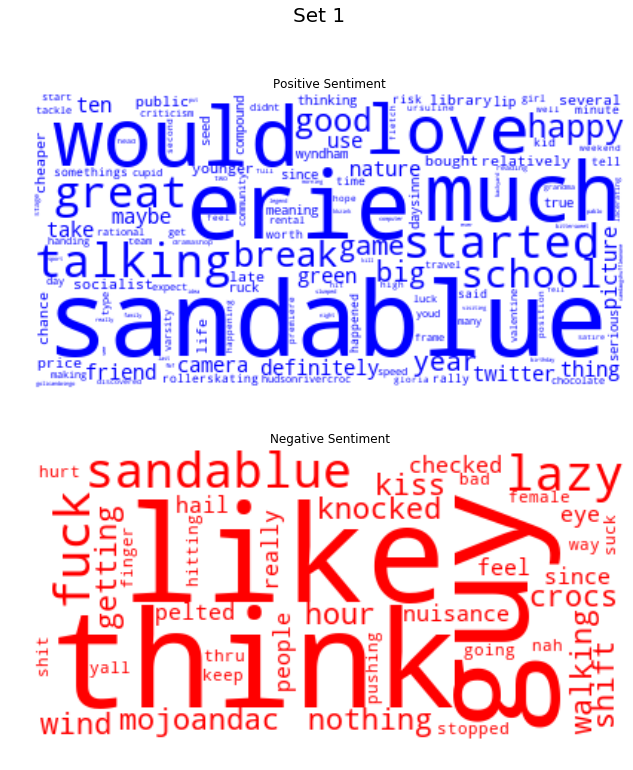

In [81]:
'''
Set 1 
7:30 AM
'''
set_n = 1
setName = 'Set 1 7:30 AM'
text_series = df[df['set']== set_n]

# Get text as list
text_list = text_series['text']

# Get freq table and word clouds
pos_df1,neg_df1 = ExamineText(text_list[:],setName)

In [82]:
pos_df.head()

,t,tf,idf,tf*idf
0,sandablue,0.025253,0.092900,0.002346
190,erie,0.020202,0.078828,0.001592
31,would,0.015152,0.063480,0.000962
34,much,0.015152,0.063480,0.000962
138,one,0.015152,0.059121,0.000896


In [83]:
neg_df.head()

,t,tf,idf,tf*idf
21,like,0.041667,0.132419,0.005517
43,guy,0.041667,0.132419,0.005517
19,think,0.041667,0.132419,0.005517
0,sandablue,0.020833,0.080650,0.001680
35,nah,0.020833,0.080650,0.001680


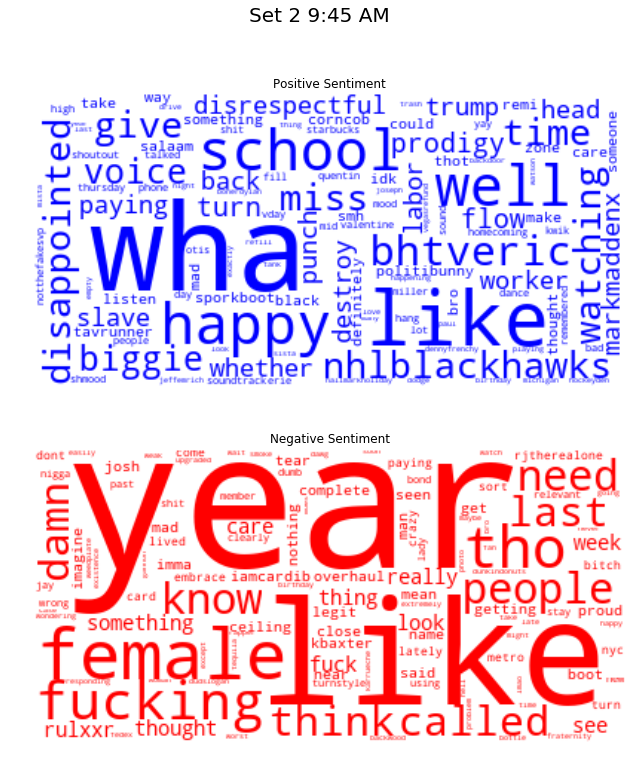

In [87]:
'''
Set 2
9:45 AM
'''
set_n = 2
setName = 'Set 2 9:45 AM'
text_series = df[df['set']== set_n]

# Get text as list
text_list = text_series['text']

# Get freq table and word clouds
pos_df,neg_df = ExamineText(text_list[:],setName)

In [88]:
pos_df.head()

,t,tf,idf,tf*idf
18,wha,0.103448,0.234691,0.024278
137,like,0.027586,0.099047,0.002732
59,album,0.013793,0.059084,0.000815
121,school,0.013793,0.059084,0.000815
62,well,0.013793,0.059084,0.000815


In [89]:
neg_df.head()

,t,tf,idf,tf*idf
37,year,0.036810,0.121546,0.004474
32,like,0.018405,0.073530,0.001353
122,female,0.018405,0.073530,0.001353
43,thought,0.012270,0.053995,0.000663
59,fucking,0.012270,0.053995,0.000663


In [ ]:
'''
Set 3 
12:00 PM
'''
set_n = 1
setName = 'Set 1'
text_series = df[df['set']== set_n]

# Get text as list
text_list = text_series['text']

# Get freq table and word clouds
set3_freq = ExamineText(text_list[:10],setName)

In [ ]:
set3_freq.head()